In [1]:
import random
import numpy as np

random.seed(6)  # Set the seed for Python's random module
np.random.seed(11)  # Set the seed for numpy's random module

In [2]:
from cabm import cabm_agent

In [3]:
model = cabm_agent.ConsumerModel(1000, "config.toml", enable_ads=True)

/Users/MikeFitzgerald/Documents/GitHub/consumer-abm/cabm/cabm_helpers/ad_calendar.py:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/Users/MikeFitzgerald/Documents/GitHub/consumer-abm/cabm/cabm_helpers/ad_calendar.py:77: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '133333.33' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[week, channel] = round(
/Users/MikeFitzgerald/Documents/GitHub/consumer-abm/cabm/cabm_helpers/ad_calendar.py:61: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the 

In [4]:
for i in range(80):
    model.step()

/Users/MikeFitzgerald/Documents/GitHub/consumer-abm/cabm/cabm_helpers/ad_helpers.py:144: UserWarning: WARNING: YOU ARE USING A MODIFIED PURCH PROB GETTER
  warnings.warn("WARNING: YOU ARE USING A MODIFIED PURCH PROB GETTER")
/Users/MikeFitzgerald/Documents/GitHub/consumer-abm/cabm/cabm_helpers/ad_helpers.py:152: UserWarning: transformed_adstock not actually transformed
  warnings.warn("transformed_adstock not actually transformed")


Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.010000000000000009, 'B': 0.99}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.010000000000000009, 'B': 0.99}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with probabilities: {'A': 0.99, 'B': 0.010000000000000009}
Purchasing with prob

In [5]:
model_df = model.datacollector.get_model_vars_dataframe()

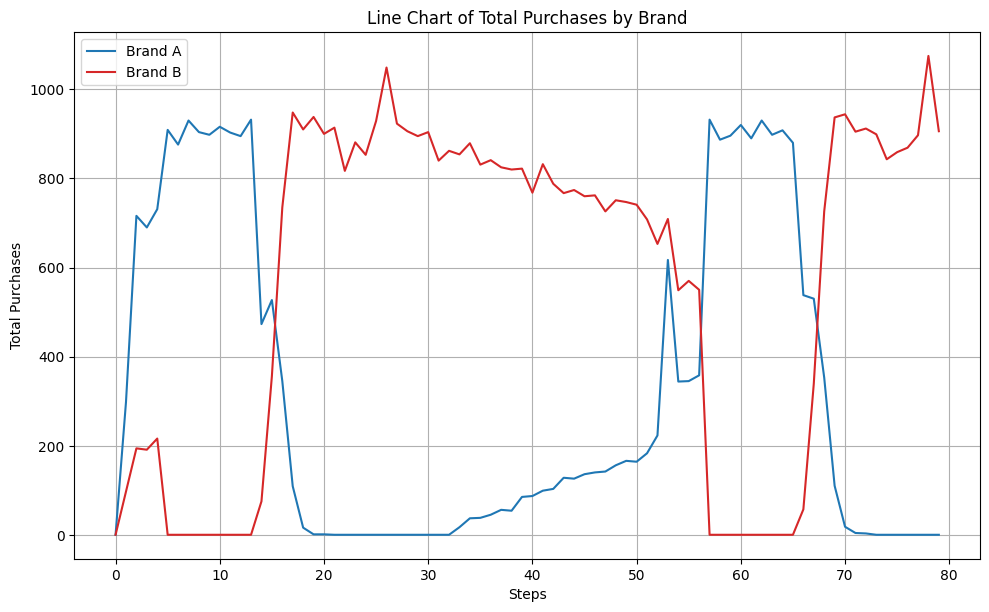

In [6]:
import matplotlib.pyplot as plt

# Extract purchases by brand
model_df['Total_Purchases_A'] = model_df['Total_Purchases'].apply(lambda x: x['A'])
model_df['Total_Purchases_B'] = model_df['Total_Purchases'].apply(lambda x: x['B'])

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_ylabel('Total Purchases')
ax1.set_xlabel('Steps')

# Plot total purchases for brand A
color = 'tab:blue'
ax1.plot(model_df['Total_Purchases_A'], color=color, label='Brand A')

# Plot total purchases for brand B
color = 'tab:red'
ax1.plot(model_df['Total_Purchases_B'], color=color, label='Brand B')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Line Chart of Total Purchases by Brand')
plt.grid(True)
plt.legend(loc='upper left')  # Add legend to the plot
plt.show()

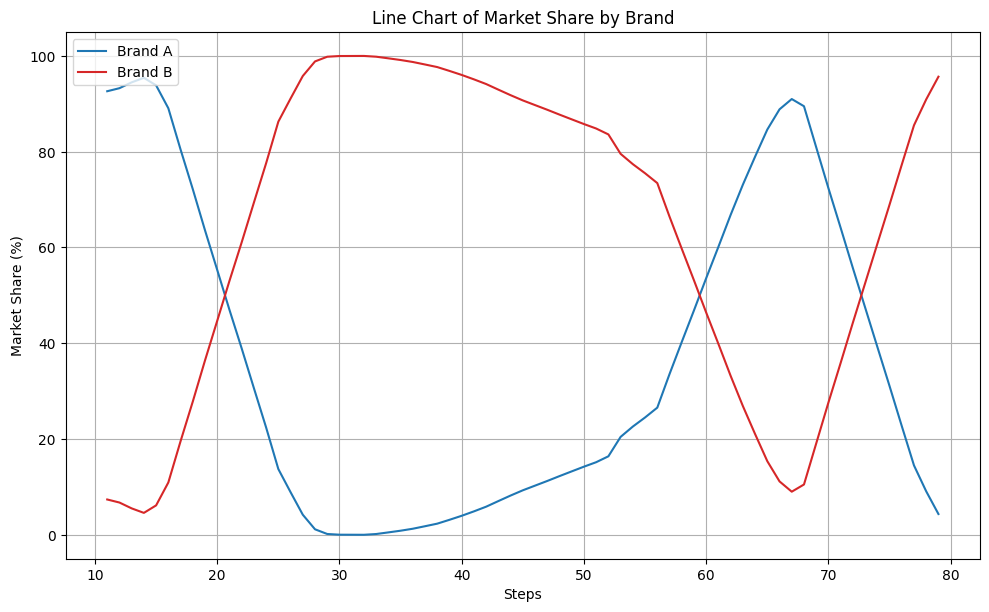

In [7]:

# Compute the monthly average for each brand
model_df['Monthly_Average_A'] = model_df['Total_Purchases_A'].rolling(window=12).mean()
model_df['Monthly_Average_B'] = model_df['Total_Purchases_B'].rolling(window=12).mean()

# Compute the total monthly average
model_df['Total_Monthly_Average'] = model_df['Monthly_Average_A'] + model_df['Monthly_Average_B']

# Compute the market share percentage for each brand
model_df['Market_Share_A'] = (model_df['Monthly_Average_A'] / model_df['Total_Monthly_Average']) * 100
model_df['Market_Share_B'] = (model_df['Monthly_Average_B'] / model_df['Total_Monthly_Average']) * 100

fig, ax2 = plt.subplots(figsize=(10,6))
ax2.set_ylabel('Market Share (%)')
ax2.set_xlabel('Steps')

# Plot market share for brand A
color = 'tab:blue'
ax2.plot(model_df['Market_Share_A'], color=color, label='Brand A')

# Plot market share for brand B
color = 'tab:red'
ax2.plot(model_df['Market_Share_B'], color=color, label='Brand B')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Line Chart of Market Share by Brand')
plt.grid(True)
plt.legend(loc='upper left')  # Add legend to the plot
plt.show()



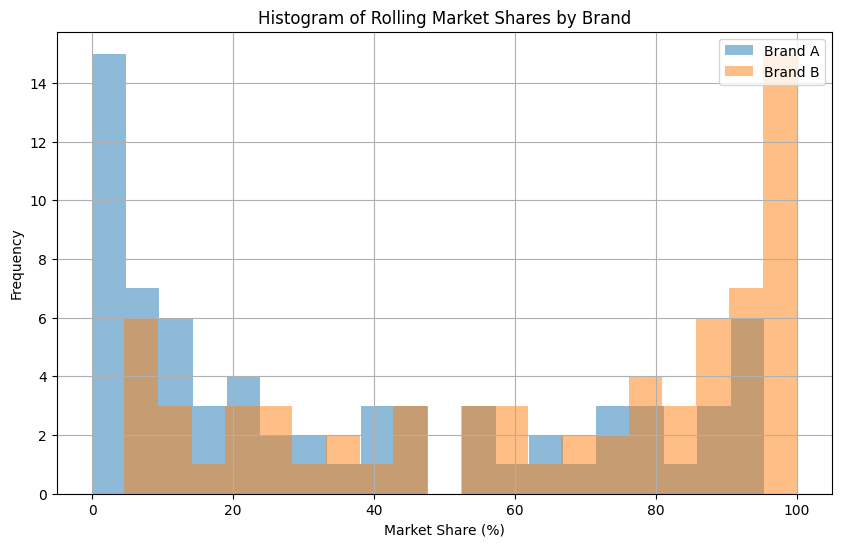

In [8]:
# Plot histogram of rolling market shares for brand A
plt.figure(figsize=(10,6))
plt.hist(model_df['Market_Share_A'], bins=20, alpha=0.5, label='Brand A')

# Plot histogram of rolling market shares for brand B
plt.hist(model_df['Market_Share_B'], bins=20, alpha=0.5, label='Brand B')

plt.title('Histogram of Rolling Market Shares by Brand')
plt.xlabel('Market Share (%)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [9]:
agent_summary_df = model.datacollector.get_agent_vars_dataframe()

In [10]:
def check_multiple_purchases(df):
    # Define a function to check if more than one value in the dictionary is greater than 0
    def more_than_one_purchase(purchases):
        return sum(value > 0 for value in purchases.values()) > 1

    # Apply the function to the 'Purchased_This_Step' column
    multiple_purchases = df['Purchased_This_Step'].apply(more_than_one_purchase)

    # Return True if there are any cases of multiple purchases, False otherwise
    return any(multiple_purchases)

# Usage:
print(check_multiple_purchases(agent_summary_df))

False


In [11]:
def count_letter_changes(series):
    # Compute the difference between consecutive letters
    letter_changes = series != series.shift()

    # Ignore the first value
    letter_changes = letter_changes.iloc[1:]

    # Sum the letter_changes series to get the number of letter changes
    change_count = letter_changes.sum()

    return change_count

In [12]:
letter_change_counts = [count_letter_changes(agent_summary_df.xs(agent_id, level='AgentID')['Brand_Preference']) for agent_id in agent_summary_df.index.get_level_values('AgentID').unique()]


In [13]:
sum(letter_change_counts)

3315

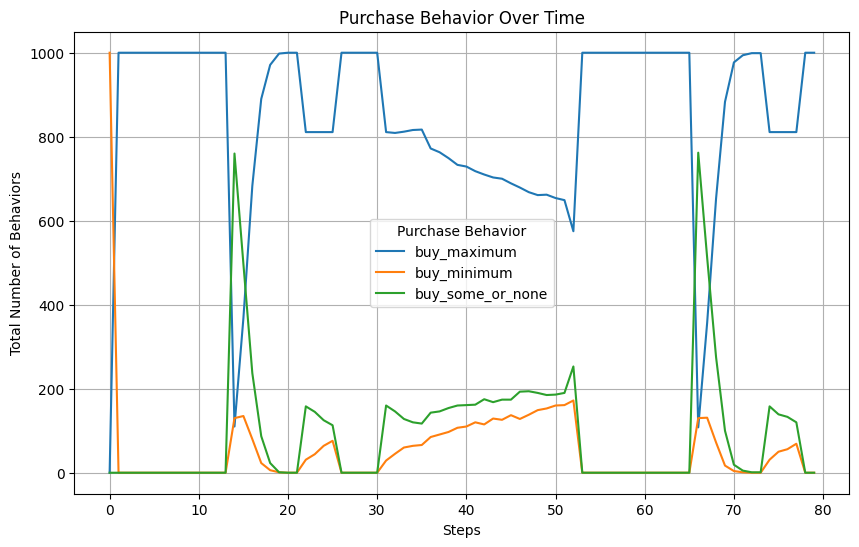

In [19]:
# Group by 'Step' and 'Purchase_Behavior' and count the occurrences
behavior_counts = agent_summary_df.groupby(['Step', 'Purchase_Behavior']).size().unstack(fill_value=0)

# Plot the behaviors over time
plt.figure(figsize=(10,6))
for behavior in behavior_counts.columns:
    plt.plot(behavior_counts.index, behavior_counts[behavior], label=behavior)

plt.title('Purchase Behavior Over Time')
plt.xlabel('Steps')
plt.ylabel('Total Number of Behaviors')
plt.legend(title='Purchase Behavior')
plt.grid(True)
plt.show()

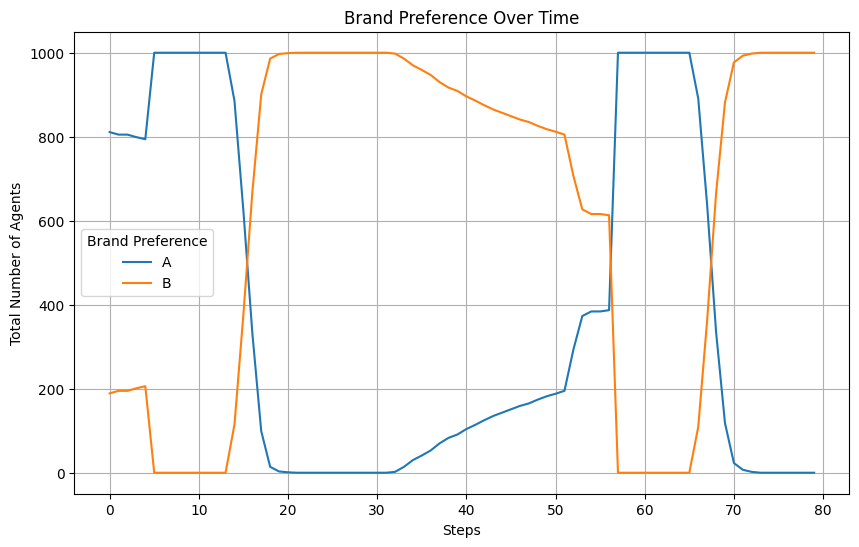

In [20]:
# Group by 'Step' and 'Brand_Preference' and count the occurrences
preference_counts = agent_summary_df.groupby(['Step', 'Brand_Preference']).size().unstack(fill_value=0)

# Plot the brand preferences over time
plt.figure(figsize=(10,6))
for preference in preference_counts.columns:
    plt.plot(preference_counts.index, preference_counts[preference], label=preference)

plt.title('Brand Preference Over Time')
plt.xlabel('Steps')
plt.ylabel('Total Number of Agents')
plt.legend(title='Brand Preference')
plt.grid(True)
plt.show()


In [22]:
agent_summary_df.columns

Index(['Household_Size', 'Consumption_Rate', 'Brand_Preference',
       'Loyalty_Rate', 'Purchase_Probabilities', 'Enable_Ads',
       'Ad_Decay_Factor', 'Ad_Channel_Preference', 'Adstock', 'Ad_Sensitivity',
       'Pantry_Min', 'Pantry_Max', 'Pantry_Stock', 'Purchased_This_Step',
       'Current_Price', 'Last_Product_Price', 'Purchase_Behavior', 'Step_Min',
       'Step_Max'],
      dtype='object')

In [34]:
agent_summary_df.xs(5, level='Step')['Purchase_Probabilities']

AgentID
168    {'A': 1.0, 'B': 0.0}
895    {'A': 1.0, 'B': 0.0}
68     {'A': 1.0, 'B': 0.0}
115    {'A': 1.0, 'B': 0.0}
573    {'A': 1.0, 'B': 0.0}
               ...         
679    {'A': 1.0, 'B': 0.0}
892    {'A': 1.0, 'B': 0.0}
739    {'A': 1.0, 'B': 0.0}
834    {'A': 1.0, 'B': 0.0}
842    {'A': 1.0, 'B': 0.0}
Name: Purchase_Probabilities, Length: 1000, dtype: object

In [30]:
agent_summary_df

Household_Size  Consumption_Rate Brand_Preference  Loyalty_Rate  \
Step AgentID                                                                    
0    0                     1          2.970715                A          0.99   
     1                     5          3.459557                A          0.99   
     2                     1          2.651574                A          0.99   
     3                     1          3.236880                A          0.99   
     4                     3          4.108023                B          0.99   
...                      ...               ...              ...           ...   
79   392                   1          3.409697                B          0.99   
     179                   2          2.935530                B          0.99   
     430                   2          1.595073                B          0.99   
     659                   1          3.560581                B          0.99   
     627                   5          2.581862                B          0.99   

                              Purchase_Probabilities  Enable_Ads  \
Step AgentID                                                       
0    0        {'A': 0.99, 'B': 0.010000000000000009}        True   
     1        {'A': 0.99, 'B': 0.010000000000000009}        True   
     2        {'A': 0.99, 'B': 0.010000000000000009}        True   
     3        {'A': 0.99, 'B': 0.010000000000000009}        True   
     4        {'A': 0.010000000000000009, 'B': 0.99}        True   
...                                              ...         ...   
79   392                        {'A': 0.0, 'B': 1.0}        True   
     179                        {'A': 0.0, 'B': 1.0}        True   
     430                        {'A': 0.0, 'B': 1.0}        True   
     659                        {'A': 0.0, 'B': 1.0}        True   
     627                        {'A': 0.0, 'B': 1.0}        True   

              Ad_Decay_Factor  \
Step AgentID                    
0    0                      2   
     1                      2   
     2                      2   
     3                      2   
     4                      2   
...                       ...   
79   392                    2   
     179                    2   
     430                    2   
     659                    2   
     627                    2   

                                          Ad_Channel_Preference  \
Step AgentID                                                      
0    0        {'Web': 0.6597145716170139, 'TV': 0.3402854283...   
     1        {'Web': 0.7619379641357331, 'TV': 0.2380620358...   
     2        {'Web': 0.6388992209449531, 'TV': 0.3611007790...   
     3        {'Web': 0.684390637022532, 'TV': 0.31560936297...   
     4        {'Web': 0.7196556419803352, 'TV': 0.2803443580...   
...                                                         ...   
79   392      {'Web': 0.693413101679674, 'TV': 0.30658689832...   
     179      {'Web': 0.6684831240754018, 'TV': 0.3315168759...   
     430      {'Web': 0.5131438603414932, 'TV': 0.4868561396...   
     659      {'Web': 0.7514702457979925, 'TV': 0.2485297542...   
     627      {'Web': 0.6881840595477509, 'TV': 0.3118159404...   

                                          Adstock  Ad_Sensitivity  Pantry_Min  \
Step AgentID                                                                    
0    0                           {'A': 0, 'B': 0}        0.233210         0.1   
     1                           {'A': 0, 'B': 0}        0.392370         0.5   
     2                           {'A': 0, 'B': 0}        0.197024         0.1   
     3                           {'A': 0, 'B': 0}        0.509266         0.1   
     4                           {'A': 0, 'B': 0}        0.146140         0.3   
...                                           ...             ...         ...   
79   392      {'A': 0.0, 'B': 27.844317913857736}        0.141138         0.1   
     179      {'A': 0.0, 'B': 30.10846627049